## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on credit card fraud detection. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussions section on Canvas. <br>
<br>

**Policy:** <br>
The course project is worth 25 points, counting towards 25% of the course final score. <br>

Late submission, empty submission or no submission receives 0 point. Please note that in order to pass the course, at least 30% of the total score for the project must be obtained. In case of special circumstances, email the instructor directly ahead of time. 

### Credit Card Fraud Detection
You can download the csv files from the project folder on Canvas.  <br>

#### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

### Module 1: Data Exploration
Load `creditcard_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 3,000 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('creditcard_train.csv')


# drop missing values
data = data.dropna()

#Standardization 
from sklearn.preprocessing import StandardScaler
data['Amount'] =  StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

# T replace to 1, mean existing fraud case
data["Class"].replace({1: "Fraud", 0: "Normal"}, inplace=True)

data_Normal= data[data.Class != "Fraud"] 
data_Fraud= data[data.Class != "Normal"] 

# fing IQR
Q1 = data_Normal.quantile(q=.25)
Q3 = data_Normal.quantile(q=.75)
IQR = Q3-Q1
# drop extreme outliers 
data_Normal = data_Normal  [~(( data_Normal  < (Q1-2.5*IQR)) | ( data_Normal > (Q3+2.5*IQR))).any(axis=1)]

# fing IQR
Q1 = data_Fraud.quantile(q=.25)
Q3 = data_Fraud.quantile(q=.75)
IQR = Q3-Q1
# drop extreme outliers 
data_Fraud = data_Fraud  [~(( data_Fraud  < (Q1-2.5*IQR)) | ( data_Fraud > (Q3+2.5*IQR))).any(axis=1)]
New_Data = data_Normal.append(data_Fraud, ignore_index=True)

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the Fraud group and in the Normal group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that other variables a, b, c have similar patterns.

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()

The distributions of variables

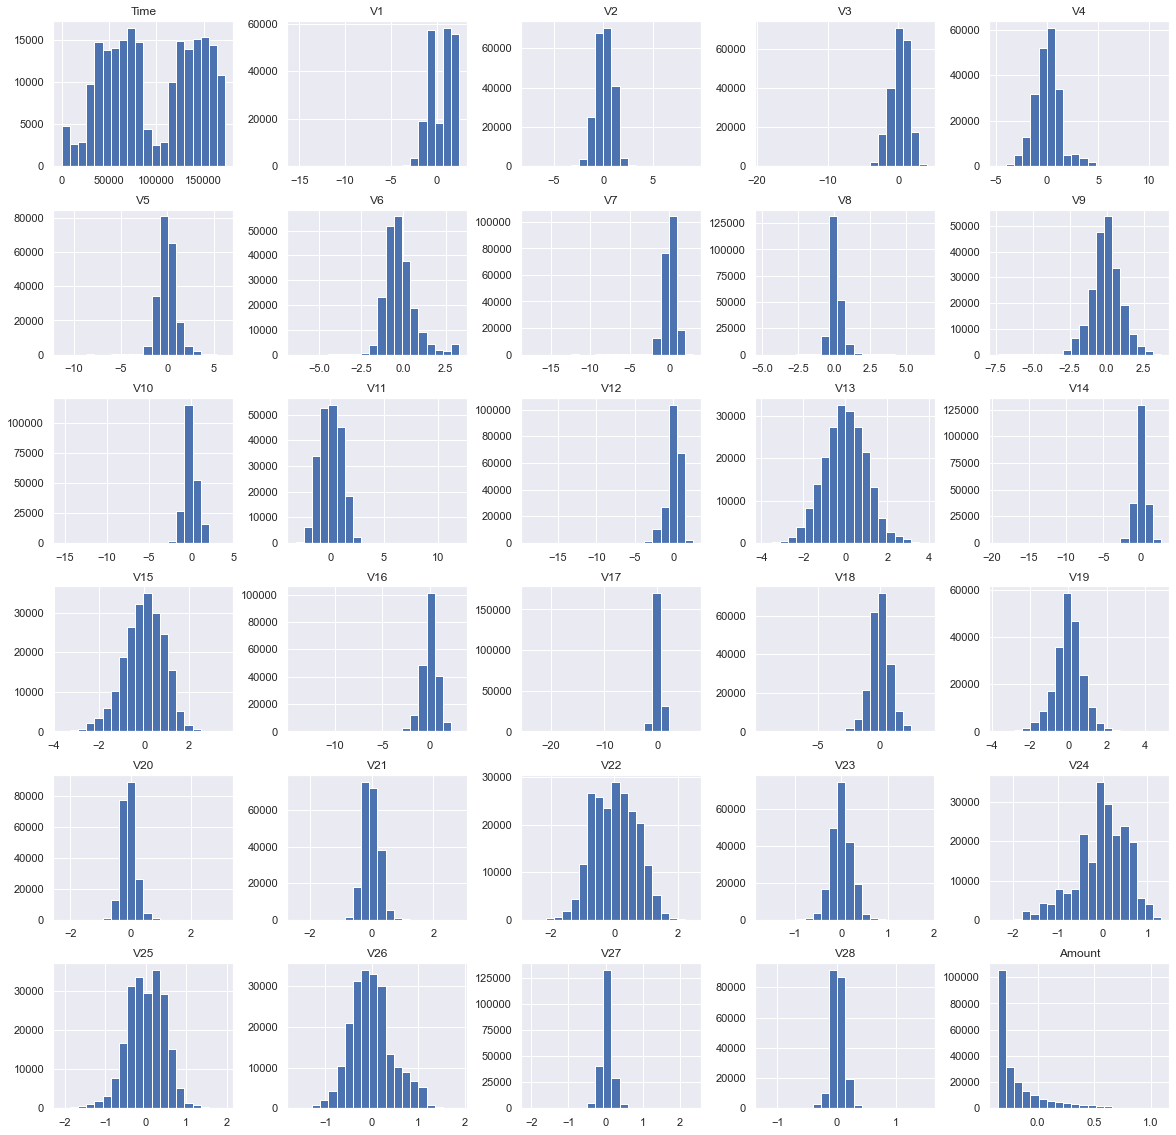

In [3]:
Data = New_Data.drop(['Class'], axis=1).hist(bins=20, figsize=(20,20))
plt.show()

Time distribution

Text(0.5, 1.0, 'Normal')

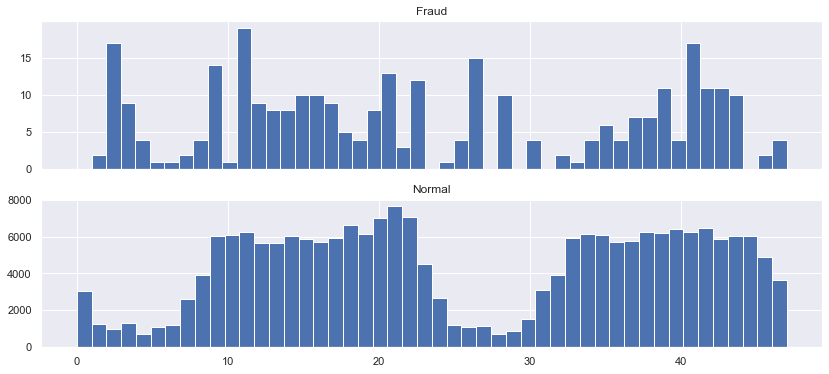

In [4]:
New_Data['hour'] = New_Data['Time'].apply(lambda x : divmod(x, 3600)[0])

fraud_data = New_Data[New_Data['Class']=="Fraud"]
normal_data = New_Data[New_Data['Class']=="Normal"]

f, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(14,6))
ax1.hist(fraud_data['hour'], bins=48)
ax1.set_title('Fraud')
ax2.hist(normal_data['hour'], bins=48)
ax2.set_title('Normal')

The variables distributed differently in the Fraud group and in the Normal group

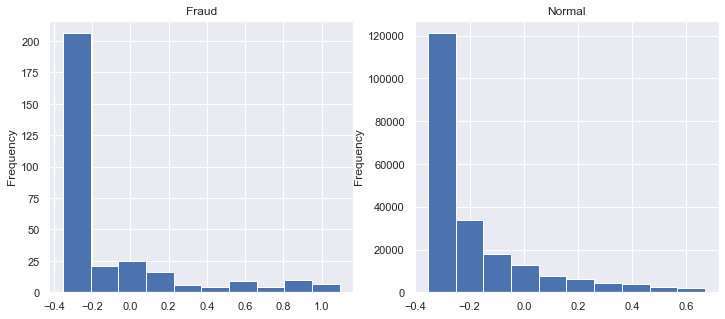

In [5]:
Fraud_tran = New_Data[New_Data["Class"]=="Fraud"]
Normal_tran= New_Data[New_Data["Class"]=="Normal"]
f, [ax1, ax2] = plt.subplots(1,2, figsize=(12,5))
Fraud_tran.Amount.plot.hist(title='Fraud', ax=ax1)
Normal_tran.Amount.plot.hist(title='Normal', ax=ax2,bins=10)
plt.show()

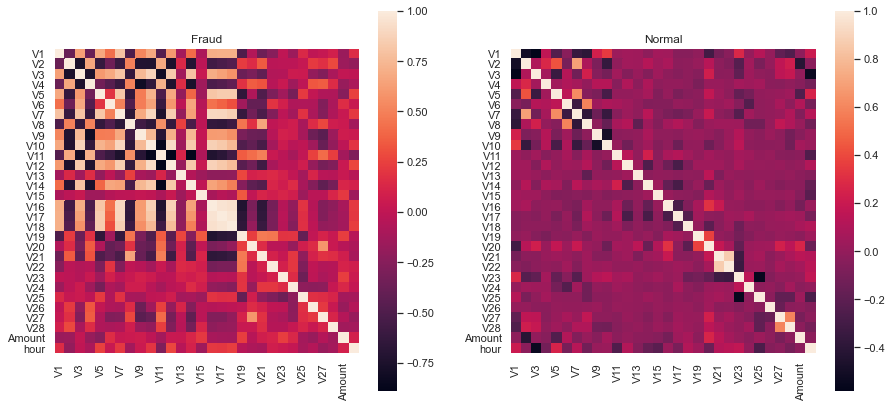

In [6]:
f, [ax1,ax2] = plt.subplots(1,2,figsize=(15,7))
sns.heatmap(Fraud_tran.drop(['Class', 'Time'],axis=1).corr(), ax=ax1, square=True)
ax1.set_title('Fraud')
sns.heatmap(Normal_tran.drop(['Class', 'Time'],axis=1).corr(), ax=ax2, square=True)
ax2.set_title('Normal')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

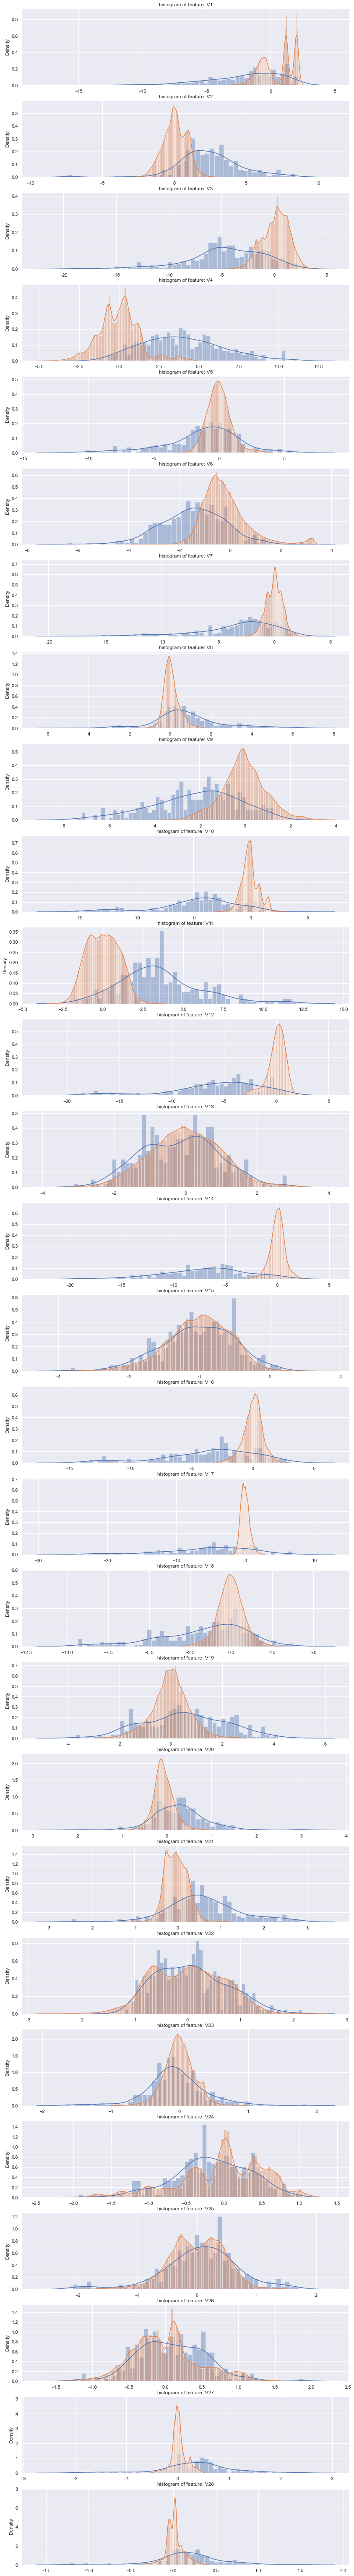

In [7]:
import matplotlib.gridspec as gridspec
v_feat = data.iloc[:,1:29].columns
plt.figure(figsize=(14, 28*4))
gs = gridspec.GridSpec(28,1)
for i, col in enumerate(v_feat):
    ax = plt.subplot(gs[i])
    sns.distplot(data_Fraud[col], bins=50)
    sns.distplot(data_Normal[col], bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(col))
plt.savefig('fraud vs normal.png')

In [8]:
data_Fraud = data_Fraud.drop(['Time'], axis=1)
data_Normal= data_Normal.drop(['Time'], axis=1)

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


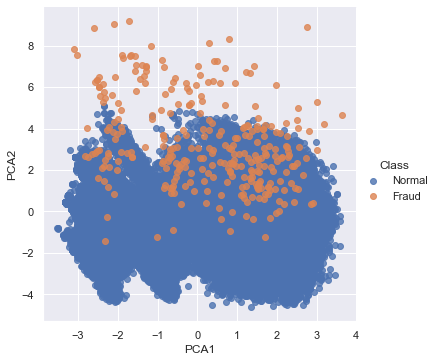

In [9]:
New_Data = data_Normal.append(data_Fraud, ignore_index=True)

XNew_Data = New_Data.drop("Class", axis=1)
XNew_Data

from sklearn.decomposition import PCA 
model = PCA(n_components=2) 
model.fit(XNew_Data) 
X_2D = model.transform(XNew_Data) # 4. Transform the data to two dimensions

New_Data['PCA1'] = X_2D[:, 0]
New_Data['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='Class', data=New_Data, fit_reg=False);

### Module 4: Classification
Choose three classification methods and build classification models, using 5-fold cross-validation. <br>

Further, load `creditcard_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the overall accuracy and the confusion matrix. <br>

Hint: because the dataset is highly unbalanced, consider undersampling, i.e. randomly select N normal observations of the same size as the N fraud observations, and use N+N=2N samples for model fitting and training. 

In [10]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
testdata = pd.read_csv('creditcard_test.csv')
testdata = testdata.drop(['Time'], axis=1)
testdata['Amount'] =  StandardScaler().fit_transform(testdata['Amount'].values.reshape(-1,1))
testdata.shape

(150, 30)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,PCA1,PCA2
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244371,Normal,2.535104,-0.063840
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342370,Normal,-0.491671,0.322161
2,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140065,Normal,2.265765,-1.161238
3,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073618,Normal,1.963212,0.126296
4,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338456,Normal,1.711783,0.273869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212588,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,-4.390842,...,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,1.040881,Fraud,0.014748,3.074730
212589,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248526,-1.127396,-3.232153,...,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350077,Fraud,-2.740874,2.630230
212590,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.042071,Fraud,0.207248,0.423932
212591,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.456108,-0.183659,-0.328168,0.606116,0.884875,-0.253700,0.625255,Fraud,0.357322,2.245610


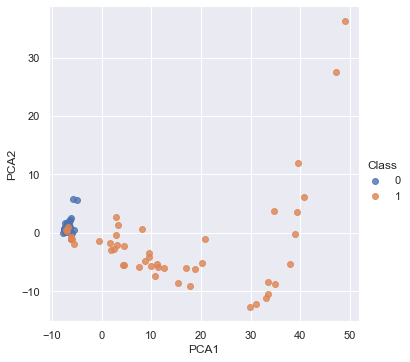

In [11]:
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(testdata) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(testdata) # 4. Transform the data to two dimensions
testdata['PCA1'] = X_2D[:, 0]
testdata['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='Class', data=testdata, fit_reg=False);
New_Data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_Normal= New_Data[New_Data.Class == "Normal" ] 
data_Fraud= New_Data[New_Data.Class == "Fraud"] 
data_Normal = data_Normal.sample(n=75)
data_Fraud = data_Fraud.sample(n=75)
New_Data = data_Normal.append(data_Fraud, ignore_index=True)
New_Data["Class"].replace({"Fraud": 1, "Normal": 0}, inplace=True)


In [13]:
X = New_Data.drop('Class', 1)
y = New_Data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y)


print(X_train.shape)
print(y_train.shape)

(112, 31)
(112,)


In [14]:
test_X = testdata.drop("Class",1)
test_y = testdata["Class"]
testX_train, testX_test, testy_train, testy_test = train_test_split(test_X, test_y)


In [15]:
print(testX_test.shape)
print(testy_test.shape)

(38, 31)
(38,)


LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

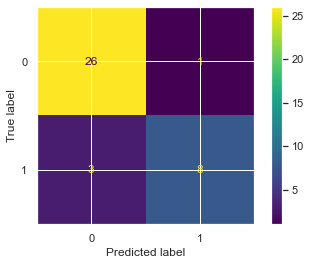

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(testX_test)
y_score = lr.decision_function(testX_test)
plot_confusion_matrix(lr, testX_test, testy_test)  
plt.show() 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2'],'C':[0.01,0.1,1,3,10]} 


clf = LogisticRegression(n_jobs=-1)
model = GridSearchCV(estimator=clf,param_grid=parameters,cv=8,n_jobs=-1,scoring='recall')
model.fit(X_train,y_train)
print(model.best_score_)
print(model.best_params_)

0.9583333333333334
{'C': 1, 'penalty': 'l2'}


RandomForest

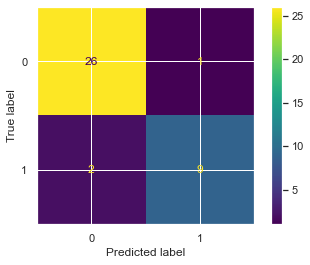

In [19]:
rf = RandomForestClassifier(n_jobs = -1,
                            random_state = 1)

rf.fit(X_train, y_train)
y_pred = rf.predict(testX_test)
y_score = rf.predict_proba(testX_test)[:,1]
plot_confusion_matrix(rf, testX_test,testy_test)  
plt.show() 

LightGBM

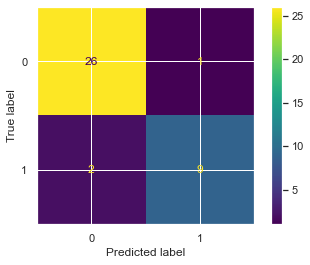

In [20]:
lgb_cf = lgb.LGBMClassifier()
lgb_cf.fit(X_train, y_train)
y_pred = lgb_cf.predict(testX_test)
y_score = lgb_cf.predict_proba(testX_test)[:,1]
plot_confusion_matrix(lgb_cf, testX_test,testy_test)  
plt.show() 

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.91 accuracy with a standard deviation of 0.05


### Module 5: Summary
Summarize your findings and draw conclusions.

1. During the data preparation stage, I explored more data and added the conversion variable hour of Time. It was found that credit card fraud is more likely to occur at 2-5 a.m. Also, I compared the distribution of unknown variables V1-V28 processed by PCA. The variables were distributed differently in the Fraud group and in the Normal group.

2. After Applying unsupervised learning methods to achieve dimension reduction, it was found that the fraud data is more extreme than the normal data. 
